<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-2--online-ad-clicks/01_basic_probability_and_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic probability and statistical analysis

Statistics is a branch of mathematics dealing with the collection and interpretation
of numeric data. It is the precursor of all modern data science.

Poor record keeping could lead to potentially
disastrous results. That is why state bureaucrats were very concerned by any
random fluctuations in their records.

Probability theory eventually tamed these
fluctuations, making the randomness interpretable. Ever since then, statistics and
probability theory have been closely intertwined.

Probability theory studies random processes over a potentially infinite number
of measurements. It is not bound by real-world limitations.

Statistics help us understand exactly how much data is sufficient
to draw insights and make impactful decisions. The purpose of statistics is to find
meaning in data even when that data is limited in size.

In this notebook, we cultivate our understanding of statistics by
applying probability theory to real-world problems.

##Setup

In [1]:
from collections import defaultdict
import itertools

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

##Exploring the relationships between data and probability

The `stats` module is very useful for assessing the randomness of data.

In [2]:
# Analyzing extreme head counts using SciPy
num_heads = 16
num_flips = 20
prob_head = 0.5

prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


If we want the probability of seeing
exactly 16 heads, then we must utilize the `stats.binom.pmf` method. That method
represents the probability mass function of the binomial distribution.

A probability mass
function maps inputted integer values to their probability of occurrence.



In [3]:
#Computing an exact probability
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of seeing {num_heads} of {num_flips} haeds is {prob_16_heads}")

The probability of seeing 16 of 20 haeds is 0.004620552062988271


Multiple
head-count probabilities can be processed by passing in a list of head-count values.

In [4]:
# Computing an array of probabilities
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)

assert probabilities.tolist() == [prob_16_heads] * 2

List-passing allows us to compute probabilities across intervals.

In [6]:
# Computing an interval probability
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()

print(f"Total sum of probabilities equals {total_prob:.14f}")

Total sum of probabilities equals 1.00000000000000


Thus, we can generate the distribution
plot without having to iterate through possible coin-flip combinations.

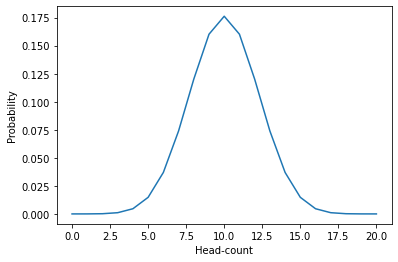

In [7]:
# Plotting a 20-coin-flip binomial distribution
plt.plot(interval_all_counts, probabilities)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

The `stats.binom.pmf` method lets us display any distribution associated with an arbitrary coin-flip count. 

Let’s use our newfound freedom to simultaneously plot the distributions
for 20, 80, 140, and 200 coin flips,

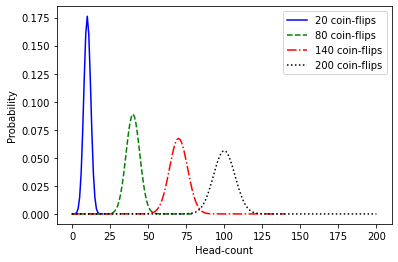

In [8]:
# Plotting five different binomial distributions
flip_counts = [20, 80, 140, 200]
linestyles = ["-", "--", "-.", ":"]
colors = ["b", "g", "r", "k"]

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
  x_values = range(num_flips + 1)
  y_values = stats.binom.pmf(x_values, num_flips, 0.5)
  plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f"{num_flips} coin-flips")
plt.legend()
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

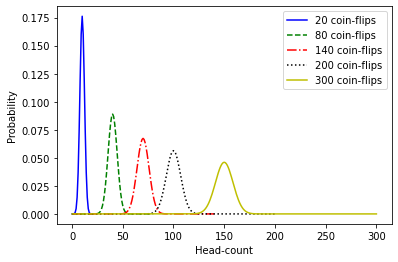

In [10]:
# Plotting five different binomial distributions
flip_counts = [20, 80, 140, 200, 300]
linestyles = ["-", "--", "-.", ":", "solid"]
colors = ["b", "g", "r", "k", "y"]

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
  x_values = range(num_flips + 1)
  y_values = stats.binom.pmf(x_values, num_flips, 0.5)
  plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f"{num_flips} coin-flips")
plt.legend()
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Within the plot, the central peak of each binomial appears to shift rightward as the coin-flip count goes up. 

Also, the 20-coin-flip distribution is noticeably thinner than
the 200-coin-flip distribution. 

In other words, the plotted distributions grow more dispersed
around their central positions as these central positions move to the right.

However, simply noting that one plot appears thicker than
another is insufficient. Likewise, stating that one plot is more rightward than another
is also insufficient.

We need to quantify our distribution differences. We must assign
specific numbers to centrality and dispersion to discern how these numbers change
from plot to plot. 

Doing so requires that we familiarize ourselves with the concepts of
variance and mean.

##Mean as a measure of centrality